<a href="https://colab.research.google.com/github/pddiste/TimeSeries/blob/master/UK_changeforest_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install changeforest

!wget https://raw.githubusercontent.com/pddiste/TimeSeries/master/UK.csv

--2022-05-21 11:57:33--  https://raw.githubusercontent.com/pddiste/TimeSeries/master/UK.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2414 (2.4K) [text/plain]
Saving to: ‘UK.csv.1’

UK.csv.1            100%[===================>]   2.36K  --.-KB/s    in 0s      

2022-05-21 11:57:33 (40.0 MB/s) - ‘UK.csv.1’ saved [2414/2414]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#uk = pd.read_csv("UK_norm.csv", sep=';', decimal=',')
uk = pd.read_csv("UK.csv",sep=';', decimal=',')
uk = uk.rename(columns={'date':'time'})       # ts implica 'time'
print(uk.info(verbose=True))
print(uk.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                40 non-null     object 
 1   sessions            40 non-null     int64  
 2   searches            40 non-null     int64  
 3   bookings            40 non-null     int64  
 4   searchesONsessions  40 non-null     float64
 5   bookingsONsessions  40 non-null     float64
 6   bookingsONsearches  40 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 2.3+ KB
None
      time  sessions  searches  bookings  searchesONsessions  \
0  2019-01   7454104  11404088     75373            1.529907   
1  2019-02   6791849   8546751     67871            1.258384   
2  2019-03   7151561   9545732     80871            1.334776   
3  2019-04   7111621   9653586     74426            1.357438   
4  2019-05   7799312  11082118     81373            1.420910   

   bo

---
---  sessions  ---
---
(40,)
float64
(40, 2)
                      best_split max_gain p_value
(0, 40]                       18   26.009   0.005
 ¦--(0, 18]                   11    10.79   0.005
 ¦   ¦--(0, 11]                4     5.54    0.01
 ¦   ¦   ¦--(0, 4]             1        0    0.28
 ¦   ¦   °--(4, 11]            9    3.328     0.1
 ¦   °--(11, 18]              14    4.978    0.02
 ¦       ¦--(11, 14]          12        0       1
 ¦       °--(14, 18]          15        0    0.28
 °--(18, 40]                  28   13.466   0.005
     ¦--(18, 28]              22     6.48    0.01
     ¦   ¦--(18, 22]          20    3.622   0.165
     ¦   °--(22, 28]          24    2.648    0.06
     °--(28, 40]              35    6.077   0.005
         ¦--(28, 35]          30    3.953   0.025
         °--(35, 40]          36    2.635    0.13
[4, 11, 14, 18, 22, 28, 35]
 
---
---  searches  ---
---
(40,)
float64
(40, 2)
                      best_split max_gain p_value
(0, 40]               

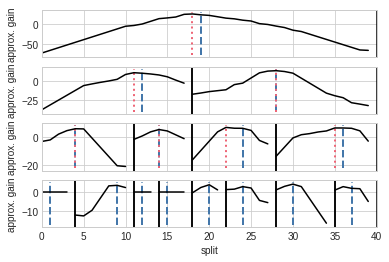

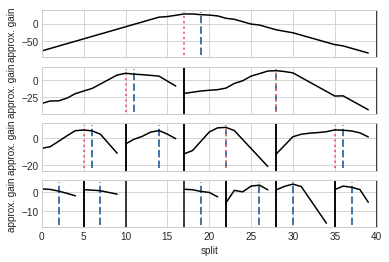

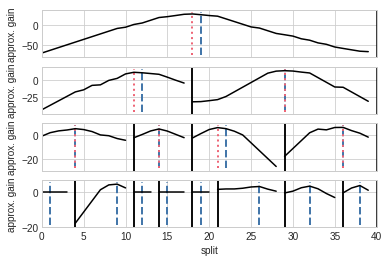

In [ ]:
# preprazione dati x changeforest

from changeforest import changeforest

varTest = ['sessions', 'searches', 'bookings']

splitPoints=[]

ivv = 0
for vv in varTest:

    print('---')
    print('--- ', vv, ' ---')
    print('---')

    d= uk[vv].shape[0]
    ss = np.full((d), 0.0)
    ss = uk[vv]

    if ivv == 0:
      sessions = uk[vv]
    else:
      if ivv == 1:
        searches = uk[vv]
      else:
        bookings = uk[vv]

    #print(ss.dtype)
    print(ss.shape)

    x = np.full((40,2),0.0)
    print(x.dtype)
    print(x.shape)
          
    x[:,1] = ss

    a = np.arange(0.0, 40)
    x[:,0] = a
    #print(x)

    result = changeforest(x, "random_forest", "bs")
    print(result)
    print(result.split_points())

    result.plot().show()

    print(" ")

    splitPoints.append(result.split_points())

    ivv += 1


In [ ]:
print(varTest)
print(splitPoints)

['sessions', 'searches', 'bookings']
[[4, 11, 14, 18, 22, 28, 35], [5, 10, 17, 22, 28, 35], [4, 11, 14, 18, 21, 29, 36]]


In [ ]:
for ii in range(len(splitPoints)):
      print('--- ', varTest[ii], ' ---')
      print(uk['time'][splitPoints[ii]])



---  sessions  ---
4     2019-05
11    2019-12
14    2020-03
18    2020-07
22    2020-11
28    2021-05
35    2021-12
Name: time, dtype: object
---  searches  ---
5     2019-06
10    2019-11
17    2020-06
22    2020-11
28    2021-05
35    2021-12
Name: time, dtype: object
---  bookings  ---
4     2019-05
11    2019-12
14    2020-03
18    2020-07
21    2020-10
29    2021-06
36    2022-01
Name: time, dtype: object


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

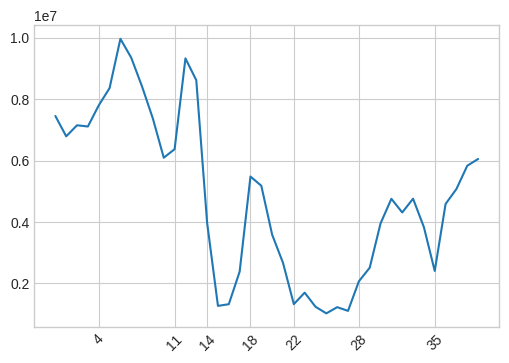

In [71]:
fig = plt.figure(dpi=100);
ax = plt.axes();
plt.xticks(rotation=45)
plt.xticks( splitPoints[0]  )
                 
plt.plot(sessions);

In [ ]:
uk['time'][splitPoints[0][0]]
print(splitPoints[0][0])

4


In [ ]:
len(splitPoints[0])

7

In [ ]:
for ii in range(len(splitPoints[0])):
      #plt.axvline(splitPoints[0][ii],uk['time'][splitPoints[0][ii]])
      plt.axvline(splitPoints[0][ii], color="red", linestyle="--", label=str(uk['time'][splitPoints[0][ii]]))